<a href="https://colab.research.google.com/github/itsbilyatt/data_science_project/blob/main/Titanic%20ML/Titanic%20Survival%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### about dataset

-->survived yes/no 1/0

-->pclass --->ticket class

-->sex

-->age in years

--> SibSp ===> number of of siblings / spouses aboard the Titanic

-->Parch	 ---> number of parents / children aboard the Titanic

-->ticket	Ticket number

-->fare	Passenger fare

-->cabin	Cabin number

--->embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson



--->embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [ ]:
# import train dataset
df=pd.read_csv(r"/content/drive/MyDrive/Dataset/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# droping unnecessary column
column_drop=['Name','SibSp','Parch','Ticket','Cabin','Embarked']


In [ ]:
# droping columns from training  data
df.drop(column_drop,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [ ]:
# age is categorical columns we can use labelencoder and pandas dummy function
# iam using one simple function insted of that
def dummy_sex(Sex):
    if Sex=='male':
        Sex=1
    else:
        Sex=0
    return Sex
df['Sex']=df['Sex'].apply(dummy_sex)

In [ ]:
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

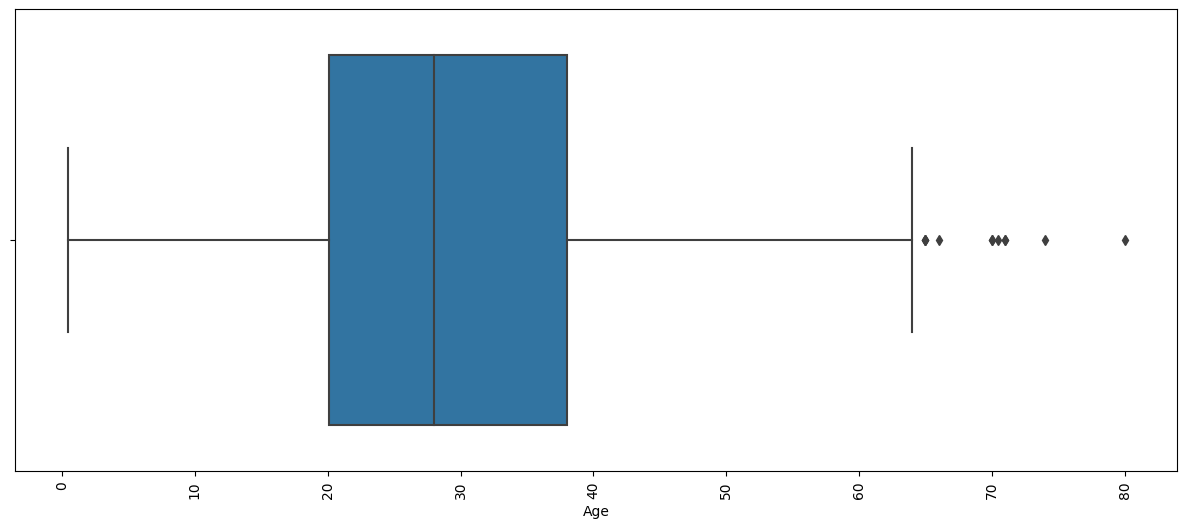

In [ ]:
# dealing with null values
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(x="Age",data=df)
plt.show()

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
print(df['Age'].mean())
print(df['Age'].mode())
print(df["Age"].median())

29.69911764705882
0    24.0
Name: Age, dtype: float64
28.0


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare
886,887,0,2,1,27.0,13.00
887,888,1,1,0,19.0,30.00
888,889,0,3,0,NaN,23.45
889,890,1,1,1,26.0,30.00
890,891,0,3,1,32.0,7.75


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [ ]:
df[['Survived','Pclass','Sex','Age','Fare']].corr()

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,0.091566
Fare,0.257307,-0.549500,-0.182333,0.091566,1.000000


<Axes: >

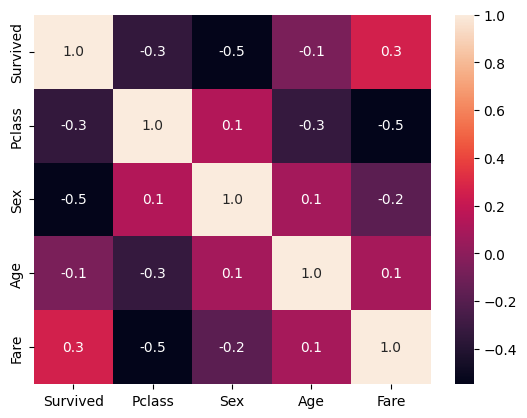

In [ ]:
sns.heatmap(df[['Survived','Pclass','Sex','Age','Fare']].corr(),annot=True,fmt=".1f")

In [ ]:
# Lets build model
# our target is survived column and remainings are predictors 'Pclass','Sex','Age',"Fare"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
x=df[['Pclass','Sex','Age',"Fare"]]
y=df['Survived']

#train_test_dataset

In [ ]:
# train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(801, 4) (90, 4) (801,) (90,)


#Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("RSqured value on train:",model.score(x_train,y_train))
print("_"*50)
print("RSqured value on test:",model.score(x_test,y_test))

RSqured value on train: 0.7915106117353309
__________________________________________________
RSqured value on test: 0.8444444444444444


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
print("RSqured value on train:",model_tree.score(x_train,y_train))
print("_"*50)
print("RSqured value on test:",model_tree.score(x_test,y_test))

RSqured value on train: 0.9845505617977528
__________________________________________________
RSqured value on test: 0.770949720670391
